In [1]:
#for data maniplution and cleaning 
import pandas as pd
import numpy as np

#For Charts
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Getting Random Forest class from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

#Getting Random Forest class from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

#For Splitting of data in train and test
from sklearn.model_selection import train_test_split

#for Mean Absolute Error of every model
from sklearn.metrics import mean_absolute_error


### Reading Data from File

In [2]:
home_data_filepath = 'E:\\Machine Learning Kaggle Work\\home-data-for-ml-course\\train.csv'

In [3]:
home_data = pd.read_csv(home_data_filepath)

### Exploratory Data Analysis 

In [4]:
#Shape of data using function
home_data.shape

(1460, 81)

In [5]:
#Getting an overview about data
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
home_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
home_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#tageted value denoted by y contain a series
y = home_data.SalePrice

In [10]:
#Overview about y
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [11]:
#length of y(no of rows)
len(y)

1460

In [12]:
#getting the no of numerical columns except object type
home_data.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
#total no of numerical columns
len(home_data.select_dtypes(exclude=['object']).columns)

38

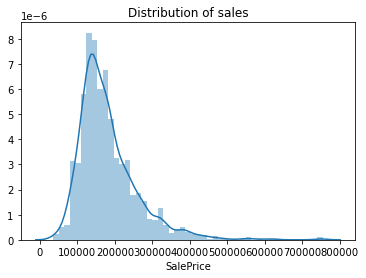

In [14]:
#skew for targated value y(salesPrice)
plt.title('Distribution of sales')
sns.distplot(y)
plt.show()

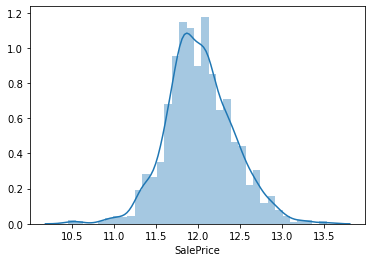

In [15]:
#correcting skew not necessary for Decision Tree, Random Forest
sns.distplot(np.log(y))

In [16]:
#characteristics/features of a house used to train model
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [17]:
#features denoted by X
X = home_data[features]

#### Getting an overview how things done

In [18]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [20]:
train_X

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
6,10084,2004,1694,0,2,3,7
807,21384,1923,1072,504,1,3,6
955,7136,1946,979,979,2,4,8
1040,13125,1957,1803,0,2,3,8
701,9600,1969,1164,0,1,3,6
...,...,...,...,...,...,...,...
715,10140,1974,1350,0,2,3,7
905,9920,1954,1063,0,1,3,6
1096,6882,1914,773,582,1,3,7
235,1680,1971,483,504,1,2,5


In [21]:
val_X

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
258,12435,2001,963,829,2,3,7
267,8400,1939,1052,720,2,4,8
288,9819,1967,900,0,1,3,5
649,1936,1970,630,0,1,1,3
1233,12160,1959,1188,0,1,3,6
...,...,...,...,...,...,...,...
1017,5814,1984,1360,0,1,1,4
534,9056,2004,707,707,2,3,6
1334,2368,1970,765,600,1,3,7
1369,10635,2003,1668,0,2,3,8


In [22]:
train_y

6       307000
807     223500
955     145000
1040    155000
701     140000
         ...  
715     165000
905     128000
1096    127000
235      89500
1061     81000
Name: SalePrice, Length: 1095, dtype: int64

In [23]:
val_y

258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
1017    187500
534     178000
1334    125000
1369    232000
628     135000
Name: SalePrice, Length: 365, dtype: int64

In [24]:
#Dict of Models Mean Absolute Error for comparsion of models
models_mae = {'home_data_model':0, 
              'home_model':0,
              'home_data_rf':0
             }

# 1st Model - Decision Tree Regressor

In [25]:
#Decision Tree Regressor
home_data_model = DecisionTreeRegressor(random_state=1)
home_data_model.fit(train_X, train_y)
home_data_model_preds = home_data_model.predict(val_X)
val_mae = mean_absolute_error(home_data_model_preds, val_y)

In [26]:
print("Mean Absolute Error",val_mae.round(3))

Mean Absolute Error 29652.932


In [27]:
models_mae['home_data_model'] = val_mae.round(3)

# 2nd - Precise DecisionTreeRegressor by max_leaf_nodes

In [28]:
#function to give Mean Absolute Error on each candidate leaf Nodes
def get_mae(max_leaf_node, train_X, val_X, train_y, val_y):
    home_model = DecisionTreeRegressor(max_leaf_nodes, train_X, val_X, train_y, val_y)
    home_model.fit(train_X, train_y)
    pred_val = home_model.predict(val_X)
    mae = mean_absolute_error(pred_val, val_y)
    return mae

In [29]:
candidate_leaf_nodes = [5, 50, 75, 100, 150]

#Getting the max leaf nodes from get_mae function
for max_leaf_nodes in candidate_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf Nodes: {} \t\t Mean Absolute Error: {}".format(max_leaf_Nodes, mymae))

C:\Users\smart\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass criterion=5, splitter=      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
6       10084       2004      1694         0         2             3   
807     21384       1923      1072       504         1             3   
955      7136       1946       979       979         2             4   
1040    13125       1957      1803         0         2             3   
701      9600       1969      1164         0         1             3   
...       ...        ...       ...       ...       ...           ...   
715     10140       1974      1350         0         2             3   
905      9920       1954      1063         0         1             3   
1096     6882       1914       773       582         1             3   
235      1680       1971       483       504         1             2   
1061    18000       1935       894         0         1             2   

      TotRmsAbvGrd

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
#Getting the best Tree Size
best_tree_size = 100

In [31]:
#Precise Decision Tree Regressor by maximum leaf nodes
home_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state=1)
home_model.fit(X, y)
preds_val = home_model.predict(val_X)
val_mae = mean_absolute_error(preds_val, val_y)

In [32]:
print("Mean Absolute Error Of Decision Tree Regressor:", val_mae.round(3))

Mean Absolute Error Of Decision Tree Regressor: 16815.939


In [33]:
#Storing model mae in dict
models_mae['home_model'] = val_mae.round(3)

# 3rd Model - Random Forest Model

In [34]:
#Random Forest model
home_data_rf = RandomForestRegressor(random_state=0)
home_data_rf.fit(train_X, train_y)
rf_preds_val = home_data_rf.predict(val_X)
rf_model_mae = mean_absolute_error(rf_preds_val, val_y)

In [35]:
print("Mean Absolute Error of Random Forest: ", rf_model_mae.round(3))

Mean Absolute Error of Random Forest:  22118.634


In [36]:
#Storing model mae in dict
models_mae['home_data_rf'] = rf_model_mae.round(3)

In [37]:
#printing the dictionary contain Mean Absolute 
print("Comparing the Models Mean Absolute Error\n ", models_mae)

Comparing the Models Mean Absolute Error
  {'home_data_model': 29652.932, 'home_model': 16815.939, 'home_data_rf': 22118.634}


### Comparing the Models using Bar Chart from Matplotlib

In [38]:
models = list(models_mae.keys())
mae = list(models_mae.values())

Text(0, 0.5, 'Models-Mean Absolute Error')

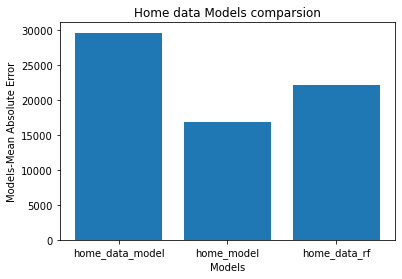

In [39]:
#Conclusion of Models 
bar_fig = plt.figure()
plt.bar(models, mae)
plt.title("Home data Models comparsion")
plt.xlabel("Models")
plt.ylabel("Models-Mean Absolute Error")